<a href="https://colab.research.google.com/github/mauricioestradadlg/activity7/blob/main/actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamiento de Datos
## Curso Ingeniería Masiva de Datos
## TecMilenio
## Ejercicio Kmeans Clustering con set de Datos Mall Customers

In [6]:
print("Hello World")

Hello World


In [7]:
# 1. Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id=1></a><br>
## Leer Datos

In [16]:
# Incuye aquí el código para leer los datos del archivo 'Mall_Customers.csv'

df = pd.read_csv('Mall_Customers.csv')

df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
# Incluye aquí el código para comprobar y describir los datos leídos

df.head() #Primeras columnas de la tabla

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.tail() #Ultimas columnas de la tabla

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [19]:
df.info() #Describe el tipo de datos en cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.describe() #Calcula terminos estadisticos en los registros de cada columna

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<a id=1></a><br>
## Explorar Datos

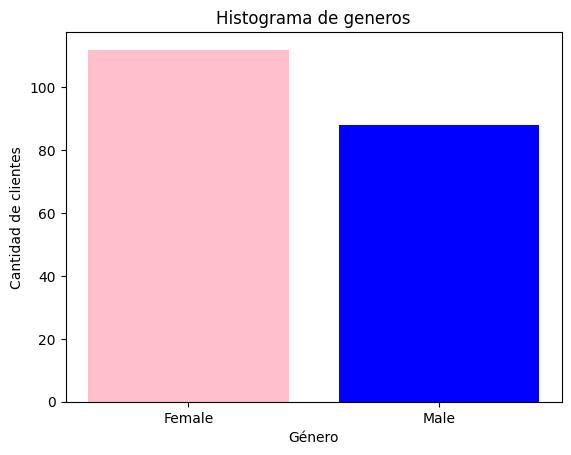

In [21]:
# Incluye aquí tu código para crear histogramas

#Histograma para contar los clientes por genero
genders = df["Gender"].value_counts()

# Se crea la grafica y se añaden los parametros necesarios
plt.bar(genders.index, genders.values, color=["pink", "blue"])

# Personalizar titulos y nombres en la grafica
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.title("Histograma de generos")

#Imprimir la grafica
plt.show()


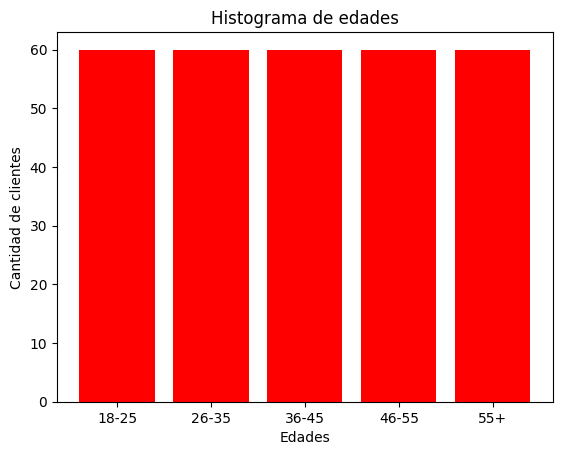

In [22]:
#Grafica de histograma por edades

#Se definen los rangos de edades para pasarlos como parametros al eje
edad18a25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
edad26a35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
edad36a45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
edad46a55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
edadMayor55 = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(edad18a25.values),len(edad26a35.values),len(edad36a45.values),len(edad46a55.values),len(edadMayor55.values)]

plt.title("Histograma de edades")
plt.xlabel("Edades")
plt.ylabel("Cantidad de clientes")
plt.bar(x, 60, width= 0.8, data=y, color="red")
plt.show()

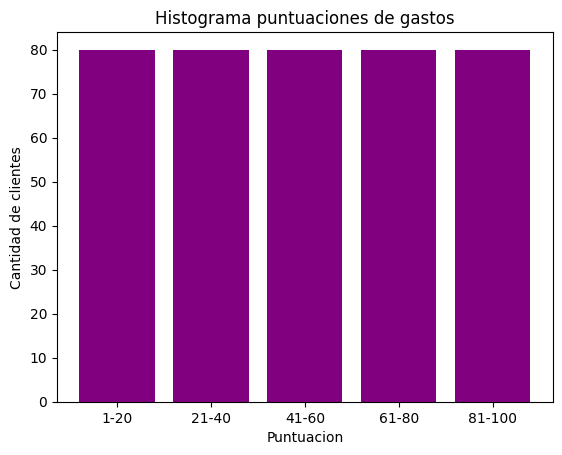

In [23]:
points1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
points21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
points41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
points61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
points81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ejeX = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ejeY = [len(points1_20.values), len(points21_40.values), len(points41_60.values), len(points61_80.values), len(points81_100.values)]


plt.title("Histograma puntuaciones de gastos")
plt.xlabel("Puntuacion")
plt.ylabel("Cantidad de clientes")
plt.bar(ejeX, 80, width = 0.8, data = ejeY, color="purple")
plt.show()

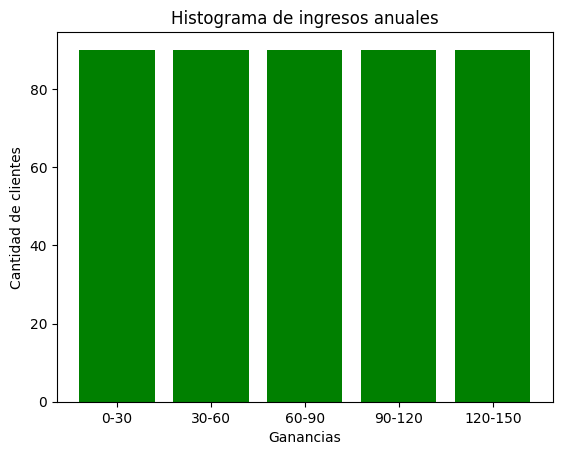

In [24]:
# Gráfica de Barras de Ingresos Anuales

ingresos0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ingresos31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ingresos61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ingresos91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ingresos121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

ejeX = ['0-30', '30-60', '60-90', '90-120', '120-150']
ejeY = [len(ingresos0_30.values), len(ingresos31_60.values), len(ingresos61_90.values), len(ingresos91_120.values), len(ingresos121_150.values)]

plt.title('Histograma de ingresos anuales')
plt.xlabel('Ganancias')
plt.ylabel('Cantidad de clientes')
plt.bar(ejeX, 90, width = 0.8 , data = ejeY, color="green")
plt.show()

In [25]:
# Eliminar columda customer id y sexo para hacer K-means con los otros Edad, Score de Gato e Ingreso

df.drop(['CustomerID'], axis = 1, inplace=True)
df.drop(['Gender'], axis = 1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<a id=2></a><br>
## K-Means

# Completa el código para la gráfica del Método Elbow

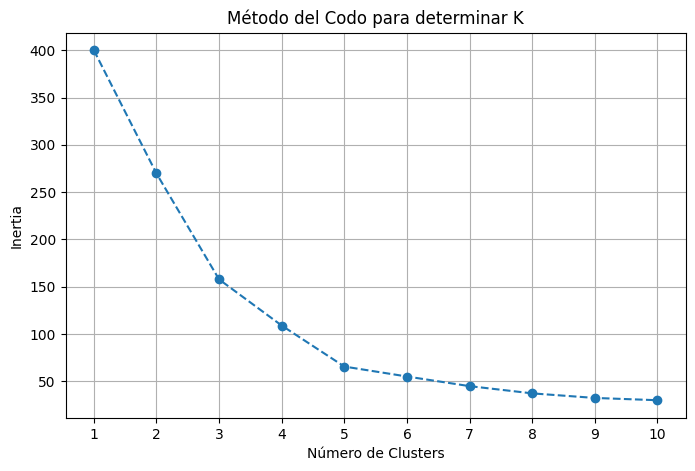

In [41]:

# Seleccionar las características relevantes para el clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Escalar los datos (opcional, pero recomendado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el método del codo
inertia = []
K = range(1, 11)  # Probar de 1 a 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo para determinar K')
plt.xticks(K)
plt.grid()
plt.show()

## ¿Cuál es el valor de K que usarías?


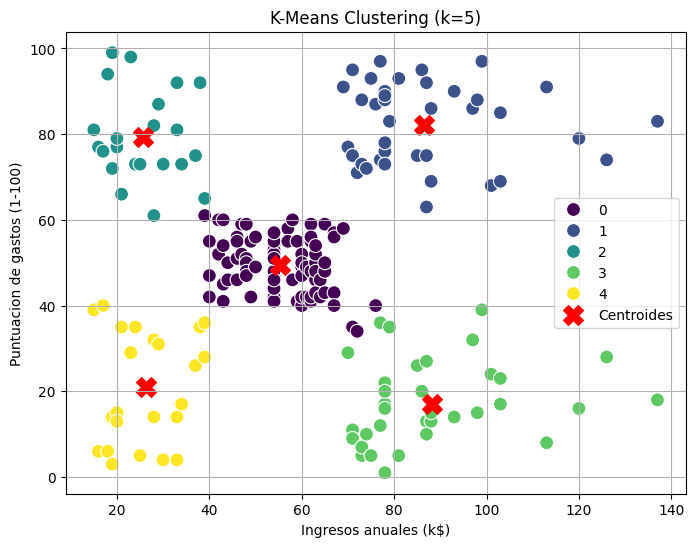

In [43]:
k = 5  # Cambia este valor según el resultado del método del codo
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)  # Asignar cada punto a un cluster

# Visualizar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette="viridis", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=200, c='red', marker='X', label='Centroides')  # Centroides
plt.xlabel("Ingresos anuales (k$)")
plt.ylabel("Puntuacion de gastos (1-100)")
plt.title(f"K-Means Clustering (k={k})")
plt.legend()
plt.grid()
plt.show()

Tenemos 5 tipos de cientes que aparecen en la gráfica en diferentes colores


# Incluye aquí la descripción de cada uno de los clusters





 Cluster 0 (azul oscuro): Este cluster agrupa puntos con ingresos anuales que varían aproximadamente entre $60 y $140 y puntuaciones de gastos entre 60 y 100.

Cluster 1 (azul claro): Este cluster agrupa puntos con ingresos anuales que varían aproximadamente entre 60k$ y 140k$ y puntuaciones de gastos entre 40 y 60.

Cluster 2 (verde): Este cluster agrupa puntos con ingresos anuales que varían aproximadamente entre 60k$ y 140k$ y puntuaciones de gastos entre 0 y 40.

Cluster 3 (amarillo): Este cluster agrupa puntos con ingresos anuales que varían aproximadamente entre 20k$ y 60k$ y puntuaciones de gastos entre 0 y 40.

Cluster 4 (morado): Este cluster agrupa puntos con ingresos anuales que varían aproximadamente entre 20k$ y 60k$ y puntuaciones de gastos entre 40 y 100.